# ***Rukmini Bugga***

## **Import libraries**

In [ ]:
import random
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
%matplotlib inline

## **Loading and Display Dataset**

In [ ]:
df = pd.read_csv("Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Dropping unnecessary columns

In [ ]:
df.drop('Id',axis=1,inplace=True)
df.drop('Species',axis=1,inplace=True)

### **Silhoutte Method**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))

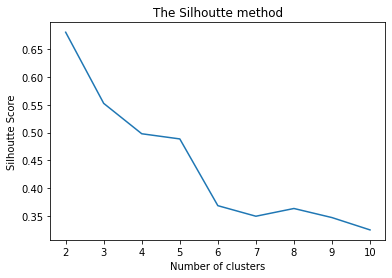

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2, 11), sil)
plt.title('The Silhoutte method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

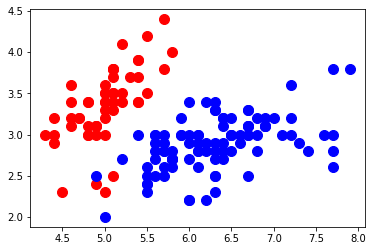

In [ ]:
kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue')
plt.show()

### **Elbow method**

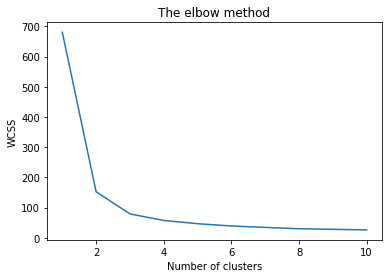

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

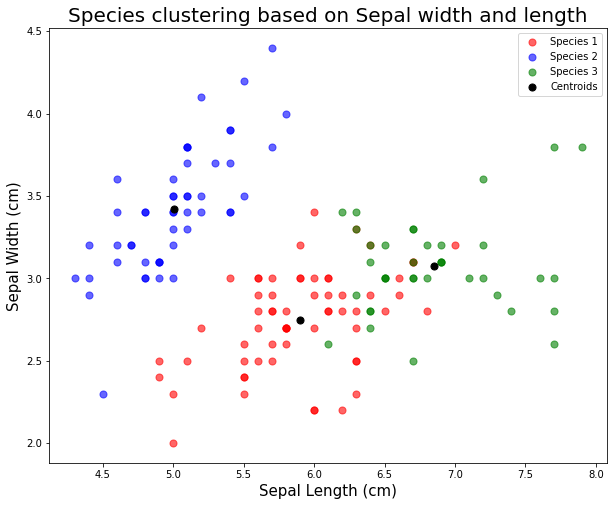

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
labels=kmeans.predict(x)
df['Label']=labels

df_a=df[df['Label']==0]
df_b=df[df['Label']==1]
df_c=df[df['Label']==2]

plt.figure(figsize=(10,8))
plt.title('Species clustering based on Sepal width and length',size=20)

plt.scatter(df_a.iloc[:,0],df_a.iloc[:,1],c='red',s=50,alpha=0.6,label='Species 1')
plt.scatter(df_b.iloc[:,0],df_b.iloc[:,1],c='blue',s=50,alpha=0.6,label='Species 2')
plt.scatter(df_c.iloc[:,0],df_c.iloc[:,1],c='green',s=50,alpha=0.6,label='Species 3')

plt.xlabel('Sepal Length (cm)',size=15)
plt.ylabel('Sepal Width (cm)',size=15)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'Centroids')



plt.legend()